In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('train3.csv')
df.info

<bound method DataFrame.info of             x1         x2         x3         x0  x4          x5          x6  \
0    56.590866 -15.164974 -71.868156 -24952.783   1   29.327799  1122.86820   
1    10.907610 -42.359173  -8.457231 -24962.082   1   90.882484   960.58179   
2    34.974998  42.709808 -15.151949 -25028.438   0  -70.219116   986.54913   
3    99.809120  52.481998  40.754562 -25033.973   1  180.038480   889.92377   
4    26.966738  23.605490 -16.185902 -25025.100   1   85.627213   922.80878   
..         ...        ...        ...        ...  ..         ...         ...   
511  87.572922   8.960876  -8.061039 -25036.633   1  151.579500  1002.47930   
512   0.204052 -21.834362  28.056559 -24976.549   0  -41.470856  1055.39700   
513  39.199738  30.464985 -53.936462 -25078.424   0  -50.433807   937.05505   
514  48.779186  40.217793 -25.745403 -24980.057   0  -50.496521   962.02460   
515  77.008270 -50.223770 -30.196480 -25049.996   1  149.419800   973.95691   

            x7     

(array([  8.,  24.,  51.,  75.,  65.,  33.,  14.,  36., 159.,  51.]),
 array([-4.21392576e+08, -3.60075453e+08, -2.98758330e+08, -2.37441206e+08,
        -1.76124083e+08, -1.14806960e+08, -5.34898368e+07,  7.82728640e+06,
         6.91444096e+07,  1.30461533e+08,  1.91778656e+08]),
 <BarContainer object of 10 artists>)

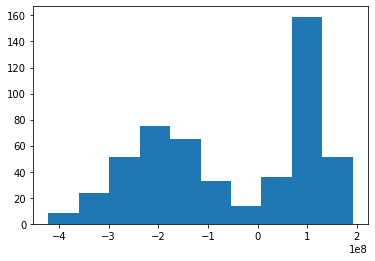

In [4]:
plt.hist(df.y)